In [1]:
import pandas as pd

In [2]:
# frac = 0.02
# data = pd.read_csv('./../data/pobreza'+str(frac)+'.csv', usecols = ['DPTO', 'PERSONA_REF_ID', 'AGLOMERADO'])


In [3]:
# len(data)/frac/2

In [4]:
# data.groupby('AGLOMERADO').count()/2

In [5]:
# sum(data.AGLOMERADO != 0)/len(data)

In [6]:
import os
import geopandas as gpd

# files = os.listdir('./../data/geojson/')


# def save_geojson(gdf, filename = 'test.geojson'):
#     try:    # Delete if geojson exists, cause overwriting is not supported
#         os.remove('./data/geojson/'+filename)
#     except OSError:
#         pass
    
#     gdf.to_file('./data/geojson/'+filename, driver="GeoJSON", encoding='utf-8')
    
from mapbox import Uploader
import json

def upload_file(data, name, username = 'matuteiglesias', token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'):
    try:    # Clear upload file if exists
        os.remove('./upload_data.geojson')
    except OSError:
        pass
    
    # Dump into file for upload    
    with open('./upload_data.geojson', 'w') as outfile:
        json.dump(data, outfile)

    service = Uploader(access_token=token)
    with open('./upload_data.geojson', 'rb') as src:
        # Acquisition of credentials, staging of data, and upload
        # finalization is done by a single method in the Python SDK.
        upload_resp = service.upload(src, username+'.'+name)
        

In [7]:
# import dask.dataframe as dd
# from dask.diagnostics import ProgressBar

In [8]:
# PERSONA = dd.read_csv('./../../extracted_/PERSONA.csv', sep = ';', usecols = ['PERSONA_REF_ID', 'HOGAR_REF_ID', 'P01', 'P02', 'P03', 'P05', 'P06',
#        'P07', 'P12', 'P08', 'P09', 'P10', 'CONDACT'])

# PERSONA_sample = PERSONA.sample(frac = 100/45000000)#.loc[PERSONA.HOGAR_REF_ID.isin(sample.HOGAR_REF_ID)]


# with ProgressBar():
#     table = PERSONA_sample.compute()

# table['P07'] = table['P07'].map({1:1, 2:2, 0:2})

# df = table[['RADIO_REF_ID']].merge(radio_ref, on = 'RADIO_REF_ID', how = 'left')

In [9]:
frac = 0.02
yr = '2020'
table = pd.read_csv('./../../extracted_/yr_samples/sample_censo_table_f'+str(frac)+'_'+yr+'_ARG.csv')

In [13]:
radio_ref = pd.read_csv('./../data/radio_ref.csv', usecols=['RADIO_REF_ID', 'radio'])
radio_ref#.nunique()

gdf = gpd.read_file('./../../../../../../home/miglesia/Documents/mapas_censo/geojson/radios_info_hogares.geojson')
# gdf.crs = {'init': 'epsg:4326'} # ya esta.
gdf = gdf.to_crs({'init': 'epsg:3395'})

gdf['radio'] = gdf['radio'].astype(int)
gdf.head()

,radio,NBI_0 Hogares sin NBI,NBI_1 Hogares con NBI,NBI_TOTAL,%_NBI_0 Hogares sin NBI,%_NBI_1 Hogares con NBI,%_NBI_TOTAL,"H05_1 Ceramica, baldosa, mosaico, marmol, madera o alfombrado",H05_2 Cemento o ladrillo fijo,H05_3 Tierra o ladrillo suelto,...,%_19C_1 Si,%_19C_2 No,%_19C_TOTAL,19D_1 Si,19D_2 No,19D_TOTAL,%_19D_1 Si,%_19D_2 No,%_19D_TOTAL,geometry
0,900770404,250.0,36.0,286.0,87.4,12.6,100.0,115.0,152.0,19.0,...,83.6,16.4,100.0,2.0,284.0,286.0,0.7,99.3,100.0,POLYGON ((-7310496.079000001 -3160523.32778228...
1,900770202,222.0,65.0,287.0,77.4,22.6,100.0,103.0,138.0,45.0,...,86.1,13.9,100.0,20.0,267.0,287.0,7.0,93.0,100.0,POLYGON ((-7306154.657999999 -3155213.37357922...
2,900630412,104.0,32.0,136.0,76.5,23.5,100.0,39.0,82.0,14.0,...,79.4,20.6,100.0,3.0,133.0,136.0,2.2,97.8,100.0,"POLYGON ((-7277499.1501 -3096200.691996627, -7..."
3,900070403,95.0,31.0,126.0,75.4,24.6,100.0,38.0,72.0,16.0,...,90.5,9.5,100.0,1.0,125.0,126.0,0.8,99.2,100.0,POLYGON ((-7180433.34765625 -3057810.078601721...
4,901050504,371.0,86.0,457.0,81.2,18.8,100.0,175.0,266.0,14.0,...,77.2,22.8,100.0,55.0,402.0,457.0,12.0,88.0,100.0,"POLYGON ((-7258244.9918 -3066506.598599662, -7..."


In [14]:
df = table.sample(100)
sample_gdf = df.merge(radio_ref).merge(gdf[['radio', 'geometry']])
sample_gdf = gpd.GeoDataFrame(sample_gdf)
sample_gdf['geometry'] = [p.centroid for p in sample_gdf.geometry]

In [15]:
sample_gdf = df.merge(radio_ref).merge(gdf[['radio', 'geometry']])
sample_gdf = gpd.GeoDataFrame(sample_gdf)
sample_gdf['geometry'] = [p.centroid for p in sample_gdf.geometry]

In [16]:
sample_gdf.plot()
# plt.show()

In [17]:
# Preparar gdf de pobreza por provincias

import geopandas as gpd
dptos_gdf = gpd.read_file('./../../../../../../../home/miglesia/Documents/censo_geo/pxdptodatosok.shp').drop([439])
dptos_gdf.crs = {'init': 'epsg:4326'} #latlong
dptos_gdf = dptos_gdf.to_crs({'init': 'epsg:3395'}) #lo dejamos en metrico

provs_gdf = dptos_gdf[['codpcia', 'geometry']].dissolve('codpcia')
provs_gdf.index = provs_gdf.index.astype(int)

# pob_prov = data.groupby('PROV')[['Pobreza']].mean()
# ingreso_mediano = data.loc[data.P03 > 24].groupby('PROV')[['P47T_persona', 'P47T_hogar']].median()
# nomprovs = radio_ref[['PROV', 'NOMPROV', 'Region']].drop_duplicates().set_index('PROV')
# provs_gdf = gpd.GeoDataFrame(pd.concat([nomprovs, ingreso_mediano, pob_prov, provs_gdf], axis = 1))


In [18]:


fancy_crs = {u'lat_0': -35,
 u'lon_0': -65,
 u'no_defs': True,
 u'proj': u'ortho',
 u'units': u'm',
 u'x_0': -65,
 u'y_0': -35,
 u'a' : 6371000, 
 u'b' : 6371000}
provs_gdf.crs = {'init': 'epsg:3395'}
# provs_gdf = provs_gdf.to_crs({'init': 'epsg:4326'})
# provs_gdf = provs_gdf.to_crs(fancy_crs)

In [19]:
provs_gdf.head()

,geometry
codpcia,
2,POLYGON ((-6503821.999117465 -4093993.25584550...
6,(POLYGON ((-6911060.472587907 -4876122.6840219...
10,POLYGON ((-7254451.715565977 -3308742.23329052...
14,POLYGON ((-6962411.695054543 -3997614.14815861...
18,POLYGON ((-6414389.232670946 -3504950.52001437...


In [20]:
# provs_gdf.head()

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

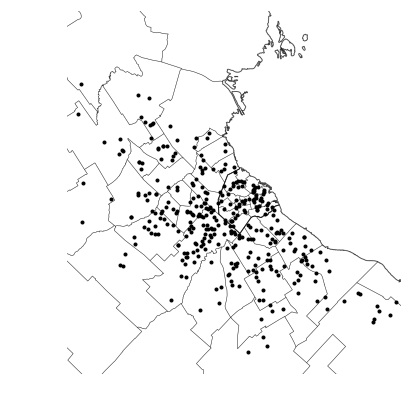

In [22]:
fig, ax = plt.subplots(1, figsize = (6, 14))

df = table.sample(1000)
sample_gdf = df.merge(radio_ref).merge(gdf[['radio', 'geometry']])
sample_gdf = gpd.GeoDataFrame(sample_gdf)
sample_gdf['geometry'] = [p.centroid for p in sample_gdf.geometry]

sample_gdf.plot(ax = ax, c = 'k', marker = '.')
provs_gdf.plot(ax = ax, alpha = .5, edgecolor = 'k', color = 'None')
dptos_gdf.plot(ax = ax, alpha = .5, edgecolor = 'k', color = 'None', lw = .5)

# Encuadre ARG
# ax.set_xlim(-8300000, -5750000)
# ax.set_ylim(-7450000, -2400000)
# ax.set_xlim(-.75e6, 1.25e6)
# ax.set_ylim(-2.3e6, 1.6e6)

# Encuadre GBA
plt.xlim(-6570000, -6450000)
plt.ylim(-4150000, -4020000)

ax.set_xlabel('A')
ax.axis('off')
plt.show()

In [30]:
n = 490
df = table.sample(n)
sample_gdf = df.merge(radio_ref).merge(gdf[['radio', 'geometry']])
sample_gdf = gpd.GeoDataFrame(sample_gdf)
sample_gdf['geometry'] = [p.centroid for p in sample_gdf.geometry]
sample_gdf.crs = {'init': 'epsg:3395'}

sample_gdf.crs
sample_gdf = sample_gdf.to_crs({'init': 'epsg:4326'})

# gdf.crs = {'init': 'epsg:4326'} # ya esta.


In [31]:

name = 'sample_'+str(n)+'_'
filename = name + '.geojson'

# save_geojson(sample_gdf, )

try:    # Delete if geojson exists, cause overwriting is not supported
    os.remove('./../data/geojson/'+filename)
except OSError:
    pass
sample_gdf.to_file('./../data/geojson/'+filename, driver="GeoJSON", encoding='utf-8')

username = 'matuteiglesias'
token = 'sk.eyJ1IjoibWF0dXRlaWdsZXNpYXMiLCJhIjoiY2puODA4bW8xMGV1dzNrcGtiOGp6NXQ5aCJ9.DohKmjn_o6MK1Y4Q5FG8ew'

files = os.listdir('./../data/geojson/')
files = [f for f in files if name in f]
# files

names = [name.split('.')[0] for name in files]

for i in range(len(files)):
    print(names[i])
    data_ = json.load(open('./../data/geojson/'+files[i]))

    try:
        upload_file(data_, names[i])
    except:
        pass


sample_490b_
